In [1]:
# Regression Problem
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/ashis/OneDrive/Desktop/Machine Learning/insurance.csv')
print(df)
df.info()
print('Shape: ', df.shape)
print('Null Values Count: ')
print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(keep='first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
print(df.dtypes)
print(df)

X = df.drop('charges', axis=1)
y = df['charges']
#X = df['bmi']
scaler = StandardScaler()
X = scaler.fit_transform(X)
import matplotlib.pyplot as plt
'''plt.scatter(X,y)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()
'''
#X = np.array(X).reshape(X.shape[0],1)
#Y = np.array(y).reshape(y.shape[0],1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones,X))
def theta_calc(x,y):
    theta_1 = np.linalg.inv(np.dot(x.T,x))
    theta_2 = np.dot(theta_1,x.T)
    theta = np.dot(theta_2,y)
    return theta

theta_val = theta_calc(X,y)
print("Theta to achieve Minimum Cost: ",theta_val)
y_pred = np.dot(X,theta_val)
def compute_cost(X, y, theta):
    m = len(y)
    y_hat = np.dot(X,theta)
    cost = (np.sum(y_hat - y)**2)/(2*m)
    return cost
print("Minimum Cost: ",compute_cost(X,y,theta_val))
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)
r2_score = r2_score(y, y_pred)
print("R2 Score: ",r2_score)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

In [2]:
# Regression Problem
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/ashis/OneDrive/Desktop/Machine Learning/insurance.csv')
print(df)
df.info()
print('Shape: ', df.shape)
print('Null Values Count: ')
print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(keep='first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
print(df.dtypes)
print(df)

X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

# Define the parameter grid including the number of neighbors, weights, and p
param_grid = {
    'knn__n_neighbors': list(range(1, 11)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

grid = GridSearchCV(pipe, param_grid, cv=10, scoring='neg_mean_squared_error')

# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)
print('Best Hyperparameters: ', grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred= best_model.predict(X_test) 

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)
r2_score = r2_score(y_test, y_pred)
print("R2 Score: ",r2_score)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

In [3]:
# Regression Problem
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/ashis/OneDrive/Desktop/Machine Learning/insurance.csv')
print(df)
df.info()
print('Shape: ', df.shape)
print('Null Values Count: ')
print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(keep='first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
print(df.dtypes)
print(df)

X = df.drop('charges', axis=1)
y = df['charges']
#X = df['bmi']
scaler = StandardScaler()
X = scaler.fit_transform(X)

#X = np.array(X).reshape(X.shape[0],1)
y = np.array(y).reshape(y.shape[0],1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones,X))
theta = np.zeros((7,1))
def compute_cost(X, y, theta):
    m = len(y)
    y_hat = np.dot(X,theta)
    cost = (np.sum(y_hat - y)**2)/(2*m)
    return cost
initial_cost = compute_cost(X, y, theta)
print("Initial Cost: ", initial_cost)
learning_rate = 0.01
def gradient_descent(x,y,learning_rate, theta, cost):
    while not np.isclose(cost,0):
        theta1 = np.dot(X,theta) - y
        theta2 = np.dot(X.T,theta1)/m
        theta -= learning_rate*theta2
        cost = compute_cost(x,y,theta)
    return theta
theta_val = gradient_descent(X,y,learning_rate, theta, initial_cost)
y_pred = np.dot(X,theta_val)
mse = mean_squared_error(y, y_pred)
print("Theta to achieve minimum cost: ", theta_val)
print("Minimum Cost: ",compute_cost(X,y,theta_val))
print("Mean Squared Error: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)
r2_score = r2_score(y, y_pred)
print("R2 Score: ",r2_score)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

In [5]:
# Using SKlearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df = pd.read_csv('C:/Users/ashis/OneDrive/Desktop/Machine Learning/insurance.csv')
print(df)
df.info()
print('Shape: ', df.shape)
print('Null Values Count: ')
print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(keep='first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
print(df.dtypes)
print(df)

X = df.drop('charges', axis=1)
y = df['charges']
#X = df['bmi']
scaler = StandardScaler()
X = scaler.fit_transform(X)

#X = np.array(X).reshape(X.shape[0],1)
y = np.array(y).reshape(y.shape[0],1)
regression_model = LinearRegression()
regression_model.fit(X,y)
y_pred = regression_model.predict(X)
print(f"Slope: {regression_model.coef_}")
print(f"Intercept: {regression_model.intercept_}")
mse = mean_squared_error(y,y_pred)
print("Mean Squared Error: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)
r2_sc = r2_score(y, y_pred)
print("R2 Score: ",r2_sc)

print()
r2_1=[]
r2_2=[]
mse1=[]
mse2=[]
rmse1=[]
rmse2=[]
for i in range(10):
    print()
    print(f"After Split {i+1}: ")
    print("For Training Set: ")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regression_model.fit(X_train,y_train)
    y_pred = regression_model.predict(X_train)
    print(f"Slope: {regression_model.coef_}")
    print(f"Intercept: {regression_model.intercept_}")
    mse = mean_squared_error(y_train,y_pred)
    mse1.append(mse)
    print("Mean Squared Error: ", mse)
    rmse = np.sqrt(mse)
    rmse1.append(rmse)
    print("Root Mean Squared Error: ", rmse)
    r2_sc = r2_score(y_train, y_pred)
    r2_1.append(r2_sc)
    print("R2 Score: ",r2_sc)
    cross_val_scores = cross_val_score(regression_model, X_train, y_train, cv = 5)
    print(f"Mean Cross_Validation_Score: {cross_val_scores.mean()}")

    print()
    print("For Testing Set: ")
    y_pred = regression_model.predict(X_test)
    print(f"Slope: {regression_model.coef_}")
    print(f"Intercept: {regression_model.intercept_}")
    mse = mean_squared_error(y_test,y_pred)
    mse2.append(mse)
    print("Mean Squared Error: ", mse)
    rmse = np.sqrt(mse)
    rmse2.append(rmse)
    print("Root Mean Squared Error: ", rmse)
    r2_sc = r2_score(y_test, y_pred)
    r2_2.append(r2_sc)
    print("R2 Score: ",r2_sc)
print()
print("For Training Set: ")
print("Mean Squared Error: ",np.array(mse1).mean())
print("Root Mean Squared Error: ",np.mean(rmse1).mean())
print("R2 Score: ",np.array(r2_1).mean())
print("Standard Deviation of R2 Score: ",np.array(r2_1).std())
print()
print("For Testing Set:" )
print("Mean Squared Error: ",np.array(mse2).mean())
print("Root Mean Squared Error: ",np.mean(rmse2).mean())
print("R2 Score: ",np.array(r2_2).mean())
print("Standard Deviation of R2 Score: ",np.array(r2_2).std())

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

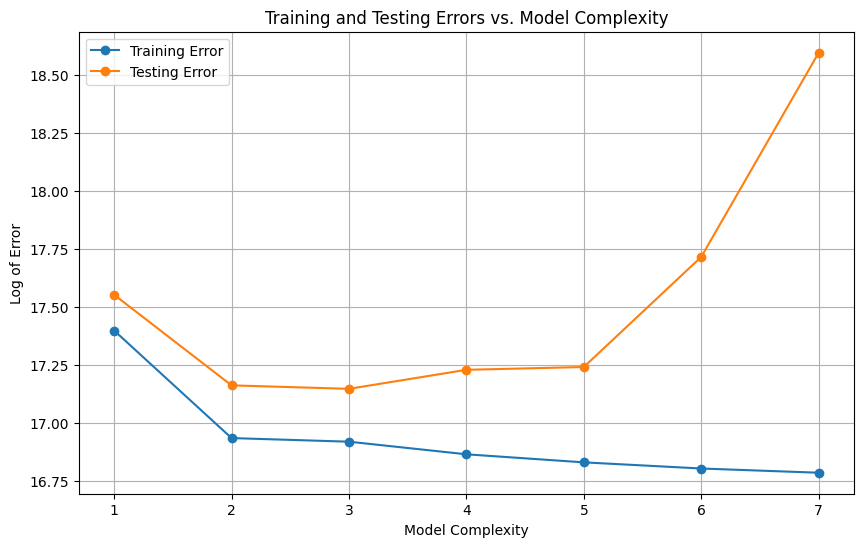

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df = pd.read_csv('C:/Users/ashis/OneDrive/Desktop/Machine Learning/insurance.csv')
print(df)
df.info()
print('Shape: ', df.shape)
print('Null Values Count: ')
print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(keep='first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
print(df.dtypes)
print(df)
y = df['charges']
#X = df['bmi']
scaler = StandardScaler()
#X = np.array(X).reshape(X.shape[0],1)
y = np.array(y).reshape(y.shape[0],1)
#polynomial fit
from sklearn.preprocessing import PolynomialFeatures

regression_model = LinearRegression()
print()
result = []
for i in range(7):
    print()
    polynomial_features= PolynomialFeatures(degree=i+1)
    X = df[['age', 'bmi', 'smoker']]
    X = scaler.fit_transform(X)
    X = polynomial_features.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    print(f"For Model Complexity {i+1}: ")
    print("For Training Set: ")
    regression_model.fit(X_train,y_train)
    y_pred = regression_model.predict(X_train)
    mse1 = mean_squared_error(y_train,y_pred)
    print("Mean Squared Error: ", mse1)
    rmse1 = np.sqrt(mse1)
    print("Root Mean Squared Error: ", rmse1)
    r2_sc1 = r2_score(y_train, y_pred)
    print("R2 Score: ",r2_sc1)
    cross_val_scores = cross_val_score(regression_model, X_train, y_train, cv = 5)
    print(f"Mean Cross_Validation_Score: {cross_val_scores.mean()}")

    print()
    print("For Testing Set: ")
    y_pred = regression_model.predict(X_test)
    mse2 = mean_squared_error(y_test,y_pred)
    print("Mean Squared Error: ", mse2)
    rmse2 = np.sqrt(mse2)
    print("Root Mean Squared Error: ", rmse2)
    r2_sc2 = r2_score(y_test, y_pred)
    print("R2 Score: ",r2_sc2)
    result.append({'Model Complexity':i+1, 'Training Error': mse1, 'Testing Error': mse2})
print()
df1 = pd.DataFrame(result)
print(df1)
df1['Training Error_log'] = df1['Training Error'].apply(lambda x:np.log(x))
df1['Testing Error_log'] = df1['Testing Error'].apply(lambda x:np.log(x))
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df1['Model Complexity'], df1['Training Error_log'], label='Training Error', marker='o')
plt.plot(df1['Model Complexity'], df1['Testing Error_log'], label='Testing Error', marker='o')
plt.title('Training and Testing Errors vs. Model Complexity')
plt.xlabel('Model Complexity')
plt.ylabel('Log of Error')
plt.legend()
plt.grid(True)
plt.show()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_

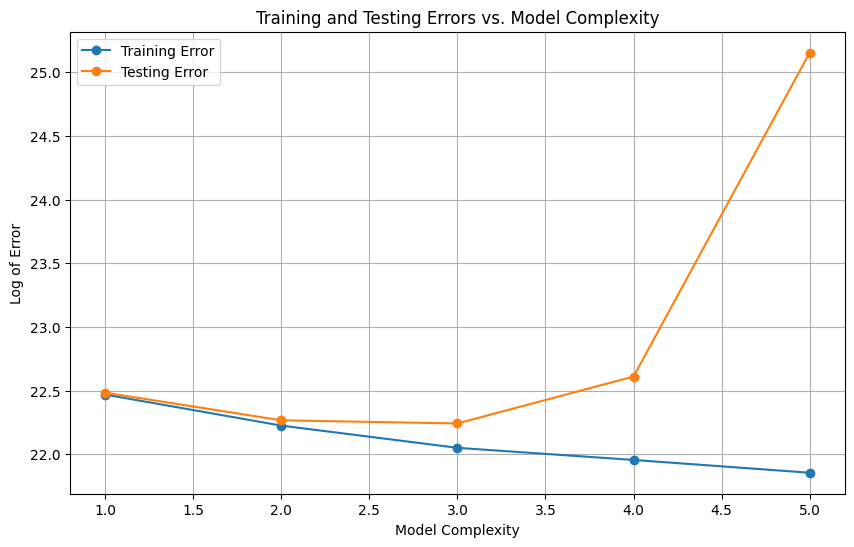

In [3]:
# California House Price Prediction
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df = pd.read_csv('C:/Users/ashis/OneDrive/Desktop/Machine Learning/california_houseprice.csv')
print(df)
df.info()
df.drop(['longitude', 'latitude'], axis=1, inplace = True)
print('Shape: ', df.shape)
print('Null Values Count: ')
print(df.isnull().sum())
print(df.duplicated().sum())
col_mean = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(col_mean, inplace = True)
print(df.isnull().sum())

df[['ocean_proximity']] = df[['ocean_proximity']].astype('category')
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.ocean_proximity.drop_duplicates())
df.ocean_proximity = label.transform(df.ocean_proximity)
print(df.dtypes)
print(df)

y = df['median_house_value']
#X = df['bmi']
scaler = StandardScaler()

#X = np.array(X).reshape(X.shape[0],1)
y = np.array(y).reshape(y.shape[0],1)
#polynomial fit
from sklearn.preprocessing import PolynomialFeatures

regression_model = LinearRegression()
print()
result = []
for i in range(5):
    print()
    polynomial_features= PolynomialFeatures(degree=i+1)
    X = df.drop('median_house_value', axis=1)
    X = scaler.fit_transform(X)
    X = polynomial_features.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    print(f"For Model Complexity {i+1}: ")
    print("For Training Set: ")
    regression_model.fit(X_train,y_train)
    y_pred = regression_model.predict(X_train)
    mse1 = mean_squared_error(y_train,y_pred)
    print("Mean Squared Error: ", mse1)
    rmse1 = np.sqrt(mse1)
    print("Root Mean Squared Error: ", rmse1)
    r2_sc1 = r2_score(y_train, y_pred)
    print("R2 Score: ",r2_sc1)
    cross_val_scores = cross_val_score(regression_model, X_train, y_train, cv = 5)
    print(f"Mean Cross_Validation_Score: {cross_val_scores.mean()}")

    print()
    print("For Testing Set: ")
    y_pred = regression_model.predict(X_test)
    mse2 = mean_squared_error(y_test,y_pred)
    print("Mean Squared Error: ", mse2)
    rmse2 = np.sqrt(mse2)
    print("Root Mean Squared Error: ", rmse2)
    r2_sc2 = r2_score(y_test, y_pred)
    print("R2 Score: ",r2_sc2)
    result.append({'Model Complexity':i+1, 'Training Error': mse1, 'Testing Error': mse2})
print()
df1 = pd.DataFrame(result)
print(df1)
df1['Training Error_log'] = df1['Training Error'].apply(lambda x:np.log(x))
df1['Testing Error_log'] = df1['Testing Error'].apply(lambda x:np.log(x))
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df1['Model Complexity'], df1['Training Error_log'], label='Training Error', marker='o')
plt.plot(df1['Model Complexity'], df1['Testing Error_log'], label='Testing Error', marker='o')
plt.title('Training and Testing Errors vs. Model Complexity')
plt.xlabel('Model Complexity')
plt.ylabel('Log of Error')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Using SKlearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

df = pd.read_csv('C:/Users/ashis/OneDrive/Desktop/Machine Learning/insurance.csv')
print(df)
df.info()
print('Shape: ', df.shape)
print('Null Values Count: ')
print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(keep='first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
print(df.dtypes)
print(df)

X = df.drop('charges', axis=1)
y = df['charges']
#X = df['bmi']
scaler = StandardScaler()
X = scaler.fit_transform(X)

#X = np.array(X).reshape(X.shape[0],1)
y = np.array(y).reshape(y.shape[0],1)
alpha = np.arange(1.0,10.0,0.2)
ridge_model = Ridge()
param_grid = {'alpha': alpha}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X,y)
best_alpha = grid_search.best_params_['alpha']

print(f"The best regularization parameter is: {best_alpha}")\

y_pred = grid_search.predict(X)
mse = mean_squared_error(y,y_pred)
print("Mean Squared Error: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)
r2_sc = r2_score(y, y_pred)
print("R2 Score: ",r2_sc)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------